# comparison of the susie_RSS analysis with the new and old GWAS sumstat

## Data Gen
### Command with Feb GWAS input

In [ ]:
nohup sos run /home/hs3163/GIT/bioworkflows/bioworkflows/multivariate-fine-mapping/mvSuSiE.ipynb summary_stats_analysis   \
    --analysis-units /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/one_gene  \
    --data-dir /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/test/ \
    --resid_cor /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/null_z_cor.rds \
    --data-suffix ".uni_weight.rds" \
    --name "SuSiE_rss" \
    --specicific_resid_corr "TRUE" \
    --ld_file_prefix "/mnt/mfs/statgen/neuro-twas/mv_wg/cache_arch/cache/" \
    --wd /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_2/ \
    --container /mnt/mfs/statgen/containers/twas_latest.sif \
    --prior /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/susie_rss.ed.rds \
    -J 40 -q csg -c ~/GIT/neuro-twas/code/csg.yml & -s  build &

### Command with Sept GWAS input

In [ ]:
nohup sos run /home/hs3163/GIT/bioworkflows/bioworkflows/multivariate-fine-mapping/mvSuSiE.ipynb summary_stats_analysis   \
    --analysis-units /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/one_gene  \
    --data-dir /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/RDS \
    --resid_cor /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/null_z_cor.rds \
    --data-suffix ".uni_weight.rds" \
    --name "SuSiE_rss" \
    --specicific_resid_corr "TRUE" \
    --ld_file_prefix "/mnt/mfs/statgen/neuro-twas/mv_wg/cache_arch/cache/" \
    --wd /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_3/ \
    --container /mnt/mfs/statgen/containers/twas_latest.sif \
    --prior /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/susie_rss.ed.rds \
    -J 40 -q csg -c ~/GIT/neuro-twas/code/csg.yml & -s  build &

In [ ]:
## After fixing the potentially wrong resid_cor
nohup sos run /home/hs3163/GIT/bioworkflows/bioworkflows/multivariate-fine-mapping/mvSuSiE.ipynb summary_stats_analysis   \
    --analysis-units /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/one_gene  \
    --data-dir /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/RDS \
    --resid_cor /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/null_z_cor.rds \
    --data-suffix ".uni_weight.rds" \
    --name "SuSiE_rss" \
    --specicific_resid_corr "TRUE" \
    --ld_file_prefix "/mnt/mfs/statgen/neuro-twas/mv_wg/cache_arch/cache/" \
    --wd /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_5/ \
    --container /mnt/mfs/statgen/containers/twas_latest.sif \
    --prior /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/susie_rss.ed.rds \
    -J 40 -q csg -c ~/GIT/neuro-twas/code/csg.yml & -s  build &

In [8]:
library("tidyverse")
library("mvsusieR")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: mashr

Loading required package: ashr

Loading required package: susieR



In [9]:
a = readRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_2/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.LDoriginal.mvsusierss.rds")
cs_old <- a$variable_names[unlist(a$sets$cs)]
input_old = readRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/test/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.uni_weight.rds")
Z_old = (input_old$bhat/input_old$sbhat)%>%as_tibble%>%mutate(snps = input_old$snps)

b =  readRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_3/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.LDoriginal.mvsusierss.rds")
cs_new <- b$variable_names[unlist(b$sets$cs)]
input_new = readRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/RDS/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.uni_weight.rds")
Z_new = (input_new$bhat/input_new$sbhat)%>%as_tibble%>%mutate(snps = input_new$snps)


## Result

### CS
#### Feb

In [2]:
(Z_old%>%filter(snps%in%cs_old))
(Z_old%>%filter(snps%in%cs_new))

ERROR: Error in filter(., snps %in% cs_old): object 'Z_old' not found


#### Sept


In [4]:
(Z_new%>%filter(snps%in%cs_old))
(Z_new%>%filter(snps%in%cs_new))

AC,DLPFC,PCC,GWAS,snps
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
3.5841530,10.3485051,4.8216895,5.827022,1:207739127_A_G
-3.4142184,-6.8902165,-2.5802309,1.969618,1:207760773_C_T
0.1396908,0.8090832,0.4892455,-1.460930,1:207762674_A_G
3.4392377,10.2623530,4.7276222,-6.043853,1:207786152_A_G
3.4316938,10.2424809,4.7378172,-6.033582,1:207786223_A_C
4.0488021,11.8327099,5.4917236,10.051859,1:207786289_A_G
3.4552060,10.4245846,4.9798055,6.849373,1:207789269_A_G


AC,DLPFC,PCC,GWAS,snps
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.174287611,0.7786918,0.3509238,-2.427934,1:207773991_C_T
0.004430121,0.7154017,0.5363334,1.555722,1:207774882_A_G
0.141306691,0.8489449,0.3424352,2.450956,1:207782931_A_G
-0.028084693,0.7386847,0.5955635,1.603948,1:207783507_C_T


### Plot
#### Feb

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


Suggested PDF canvas width: 9 height: 2.8 


$plot

$width
[1] 9

$height
[1] 2.8


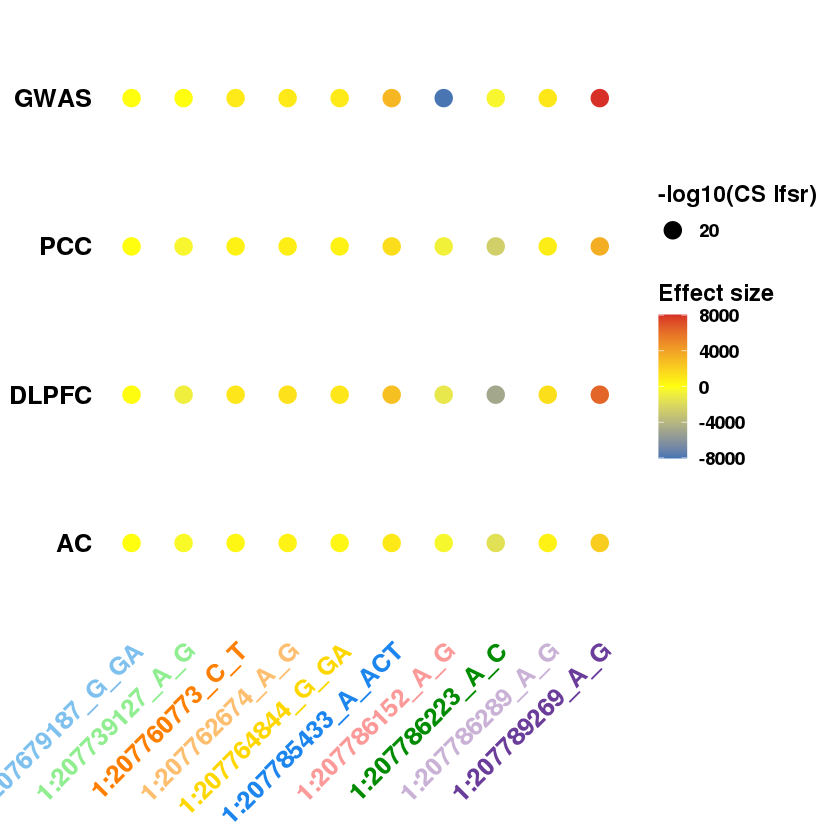

In [5]:
a %>% mvsusie_plot()

#### Sept

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


Suggested PDF canvas width: 5.4 height: 2.8 


$plot

$width
[1] 5.4

$height
[1] 2.8


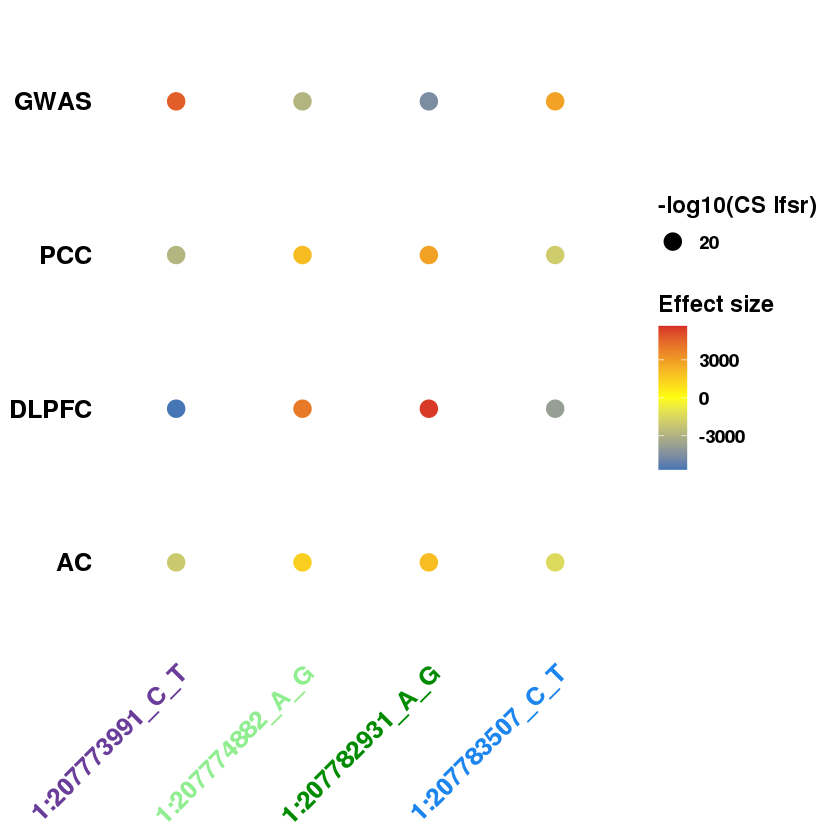

In [20]:
b %>% mvsusie_plot()

In [ ]:
### Todo, try merge the gene with allele flip and do it again!!

### Allele Flip Feb

In [ ]:
nohup sos run /home/hs3163/GIT/bioworkflows/bioworkflows/multivariate-fine-mapping/mvSuSiE.ipynb summary_stats_analysis   \
    --analysis-units /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/one_gene  \
    --data-dir /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/remerge/RDS/ \
    --resid_cor /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/null_z_cor.rds \
    --data-suffix ".uni_weight.rds" \
    --name "SuSiE_rss" \
    --specicific_resid_corr "TRUE" \
    --ld_file_prefix "/mnt/mfs/statgen/neuro-twas/mv_wg/cache_arch/cache/" \
    --wd /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_5/ \
    --container /mnt/mfs/statgen/containers/twas_latest.sif \
    --prior /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/susie_rss.ed.rds \
    -J 40 -q csg -c ~/GIT/neuro-twas/code/csg.yml & -s  build &

## Rerun with resid fixed

nohup sos run /home/hs3163/GIT/bioworkflows/bioworkflows/multivariate-fine-mapping/mvSuSiE.ipynb summary_stats_analysis   \
    --analysis-units /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/one_gene  \
    --data-dir /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/remerge/RDS/ \
    --resid_cor /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/null_z_cor.rds \
    --data-suffix ".uni_weight.rds" \
    --name "SuSiE_rss" \
    --specicific_resid_corr "TRUE" \
    --ld_file_prefix "/mnt/mfs/statgen/neuro-twas/mv_wg/cache_arch/cache/" \
    --wd /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_6/ \
    --container /mnt/mfs/statgen/containers/twas_latest.sif \
    --prior /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/susie_rss.ed.rds \
    -J 40 -q csg -c ~/GIT/neuro-twas/code/csg.yml & 

In [62]:

c = readRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_4/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.LDoriginal.mvsusierss.rds")
cs_old_flip <- c$variable_names[unlist(c$sets$cs)]
input_old_flip = readRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/remerge/RDS/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.uni_weight.rds")
Z_old_flip = (input_old_flip$bhat/input_old_flip$sbhat)%>%as_tibble%>%mutate(snps = input_old_flip$snps)



### Result comparison

In [63]:
intersect(cs_old,cs_old_flip)

[1] "1:207786289_A_G" "1:207786223_A_C" "1:207786152_A_G"

In [64]:
Z_old_flip%>%filter(snps%in%intersect(cs_old,cs_old_flip))
Z_old_flip%>%filter(snps%in%cs_old_flip,!snps%in%cs_old)
Z_old_flip%>%filter(!snps%in%cs_old_flip,snps%in%cs_old)

AC,DLPFC,PCC,GWAS,snps
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
3.439238,10.26235,4.727622,-4.569444,1:207786152_A_G
3.431694,10.24248,4.737817,-4.541667,1:207786223_A_C
4.048802,11.83271,5.491724,7.965909,1:207786289_A_G


AC,DLPFC,PCC,GWAS,snps
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.305669474,0.9160712,0.4397057,-2.260116,1:207752239_C_T
0.131426298,0.8030107,0.5363334,-1.450549,1:207766156_A_C
0.004430121,0.7154017,0.5363334,-1.387978,1:207767449_C_T
0.004430121,0.7154017,0.5363334,-1.377049,1:207772154_C_T
3.990609661,11.7371398,5.4917236,7.920455,1:207786542_A_G
4.048802112,11.8327099,5.4917236,7.971591,1:207786828_A_G


AC,DLPFC,PCC,GWAS,snps
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.1413067,0.8489449,0.3424352,2.184971,1:207782931_A_G


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


Suggested PDF canvas width: 8.4 height: 2.8 


$plot

$width
[1] 8.4

$height
[1] 2.8


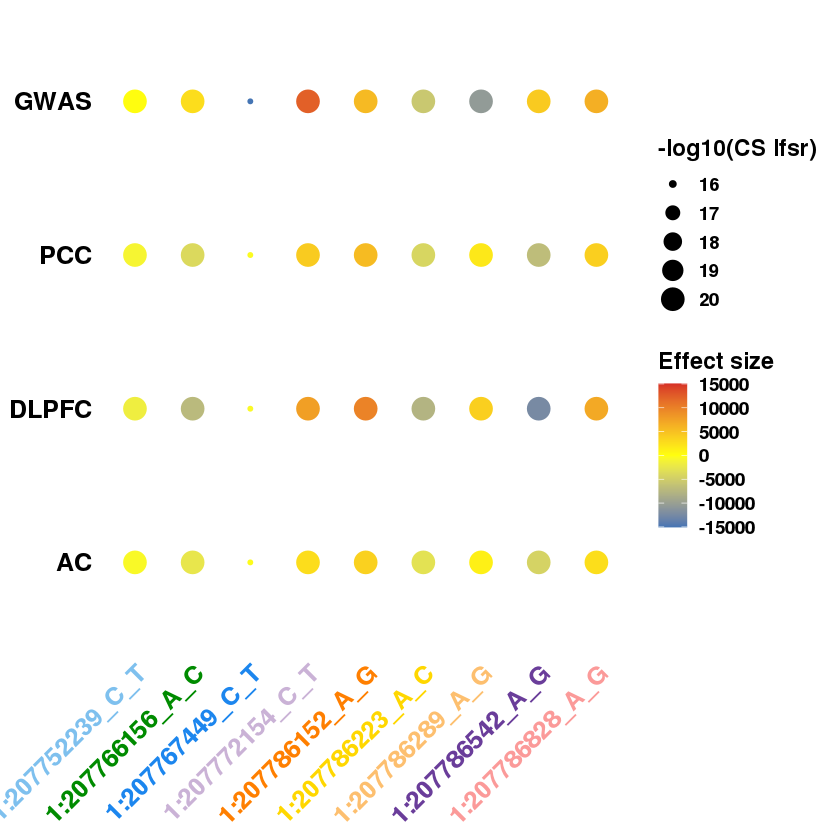

In [9]:
c%>%mvsusie_plot

### LD Matrix

In [12]:
R = readRDS("/mnt/mfs/statgen/neuro-twas/mv_wg/cache_arch/cache/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.merged.ld.rds")

In [13]:
R[cs_old_flip,cs_old_flip]

,1:207767449_C_T,1:207766156_A_C,1:207786542_A_G,1:207786152_A_G,1:207786223_A_C,1:207752239_C_T,1:207786828_A_G,1:207772154_C_T,1:207786289_A_G
1:207767449_C_T,1.000000,0.996293,-0.242677,0.534472,0.530447,0.903134,-0.240249,1.000000,-0.240249
1:207766156_A_C,0.996293,1.000000,-0.243398,0.536988,0.533016,0.903311,-0.237431,0.996293,-0.237431
1:207786542_A_G,-0.242677,-0.243398,1.000000,0.612851,0.614975,-0.257889,0.998292,-0.242677,0.998292
1:207786152_A_G,0.534472,0.536988,0.612851,1.000000,0.998837,0.595436,0.616034,0.534472,0.616034
1:207786223_A_C,0.530447,0.533016,0.614975,0.998837,1.000000,0.591846,0.618166,0.530447,0.618166
1:207752239_C_T,0.903134,0.903311,-0.257889,0.595436,0.591846,1.000000,-0.252263,0.903134,-0.252263
1:207786828_A_G,-0.240249,-0.237431,0.998292,0.616034,0.618166,-0.252263,1.000000,-0.240249,1.000000
1:207772154_C_T,1.000000,0.996293,-0.242677,0.534472,0.530447,0.903134,-0.240249,1.000000,-0.240249
1:207786289_A_G,-0.240249,-0.237431,0.998292,0.616034,0.618166,-0.252263,1.000000,-0.240249,1.000000


In [10]:
intersect(cs_old,cs_old_flip)

[1] "1:207786223_A_C" "1:207786152_A_G" "1:207786289_A_G"

## Sanity check

In [ ]:
nohup sos run /home/hs3163/GIT/bioworkflows/bioworkflows/multivariate-fine-mapping/mvSuSiE.ipynb summary_stats_analysis   \
    --analysis-units /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/one_gene  \
    --data-dir /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_sanity \
    --resid_cor /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/null_z_cor_eqtl.rds \
    --data-suffix ".uni_weight.rds" \
    --name "SuSiE_rss" \
    --wd /mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_sanity \
    --ld_file_prefix "/mnt/mfs/statgen/neuro-twas/mv_wg/cache_arch/cache/" \
    --specicific_resid_corr "TRUE" \
    --specicific_resid_corr_dir "/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_sanity/" \
    --container /mnt/mfs/statgen/containers/twas_latest.sif \
    --prior /home/hs3163/Project/Genome_prior/mixture_prior/output/susie.ed_bovy.rds \
    -J 40 -q csg -c ~/GIT/neuro-twas/code/csg.yml &

In [45]:
d = readRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_sanity/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.LDoriginal.mvsusierss.rds")
cs_sanity <- d$variable_names[unlist(d$sets$cs)]
input_sanity = readRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_sanity/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.uni_weight.rds")
Z_sanity = (input_sanity$bhat/input_sanity$sbhat)%>%as_tibble%>%mutate(snps = input_sanity$snps)


In [46]:
cs_sanity

[1] "1:207668630_C_T" "1:207671476_C_T" "1:207786289_A_G" "1:207784968_A_G"
[5] "1:207673980_A_G" "1:207671849_A_C"

In [5]:
complete_ana = attach("/mnt/mfs/statgen/neuro-twas/mv_wg/result_arch/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.mv_susie.model.RData")



In [6]:
complete_ana = complete_ana$m_ENSG00000203710

In [12]:
complete_bim = attach("/mnt/mfs/statgen/neuro-twas/mv_wg/result_arch/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.transformed_XY.RData")

In [17]:
ori_snps = complete_bim$scaled_ENSG00000203710[[1]]%>%colnames()

In [18]:
complete_ana$snps = ori_snps

In [22]:
complete_ana = readRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_sanity/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.ori.rds")

In [51]:
complete_ana_selected$sigma2
d$sigma2

1.0014000,0.5704956,0.3140489
0.5704956,1.0081890,0.3682481
0.3140489,0.3682481,0.9970218


1.0013997,0.3140488,0.5704953
0.3140488,0.9970217,0.3682478
0.5704953,0.3682478,1.0081887


In [47]:
cs_ori = complete_ana_selected$m_ENSG00000203710$variable_names[complete_ana_selected$m_ENSG00000203710$set$cs%>%unlist]

In [76]:
complete_ana_selected$sets$cs

$L1
[1] 719 727 741 773 775 777 779

In [77]:
length(cs_sanity)

[1] 6

In [74]:
Z_old%>%filter(snps%in%intersect(cs_ori,cs_sanity))
Z_old%>%filter(snps%in%(cs_sanity))
Z_old%>%filter(snps%in%(cs_ori))

AC,DLPFC,PCC,GWAS,snps
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
4.048802,11.83271,5.491724,7.965909,1:207784968_A_G
4.048802,11.83271,5.491724,7.965909,1:207786289_A_G


AC,DLPFC,PCC,GWAS,snps
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1.5669650,6.9025242,2.3273858,3.6013072,1:207668630_C_T
2.3818981,8.8778175,3.4012020,4.2777778,1:207671476_C_T
-0.6021444,-0.4623175,-0.6769395,-0.2102804,1:207671849_A_C
-0.6021444,-0.4623175,-0.6769395,-0.2046512,1:207673980_A_G
4.0488021,11.8327099,5.4917236,7.9659091,1:207784968_A_G
4.0488021,11.8327099,5.4917236,7.9659091,1:207786289_A_G


AC,DLPFC,PCC,GWAS,snps
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
3.725847,11.83342,4.830590,7.956757,1:207685965_A_C
3.864166,11.89057,5.014845,7.918919,1:207692049_A_G
3.946333,11.94170,5.326487,8.044944,1:207747296_A_G
4.048802,11.83271,5.491724,7.965909,1:207784968_A_G
4.048802,11.83271,5.491724,7.965909,1:207786289_A_G
3.990610,11.73714,5.491724,7.920455,1:207786542_A_G
4.048802,11.83271,5.491724,7.971591,1:207786828_A_G


In [72]:
intersect(cs_sanity, cs_old)

[1] "1:207786289_A_G"

In [49]:
complete_ana_selected = complete_ana_selected$m_ENSG00000203710

In [ ]:
complete_ana_selected$

In [24]:
sum(complete_ana$snps %in% d$variable_names)

[1] 1876

In [30]:
length($variable_names)

ERROR: Error in c$variable_names: object of type 'builtin' is not subsettable


In [10]:
e = readRDS("/mnt/mfs/statgen//neuro-twas/TWAS_sumstat/RDS/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.uni_weight.rds")

In [30]:
(complete_ana$snps%in%Z_old$snps)%>%sum

[1] 2487

In [33]:
/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/RDS/

[1] "AC"    "DLPFC" "PCC"   "GWAS"

In [17]:
f = readRDS("/home/hs3163/Project/Genome_prior/mixture_prior/output/RDS/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.uni_weight.rds")

In [31]:
d = readRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/test/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.uni_weight.rds")

AC,DLPFC,PCC,GWAS
0.001829300,0.0083648705,0.0172554887,-0.0244
0.057652641,0.0777235966,0.0570366723,NA
-0.002590476,-0.0243250808,0.0028843296,-0.0040
0.002565278,-0.0189151856,0.0005988672,NA
0.003849819,-0.0398376552,-0.0342613242,-0.0233
-0.002590476,-0.0243250808,0.0028843296,NA
0.024445108,0.0105319373,0.0047475620,-0.0006
0.012386965,0.0351482243,0.0393312204,0.0085
0.001829300,0.0083648705,0.0172554887,0.0225
0.009187638,-0.0149994512,0.0104211815,NA


In [36]:
sum(Z_old$snps%in%complete_ana$snps)

[1] 2487

In [1]:
complete_ana_selected = attach("/mnt/mfs/statgen/neuro-twas/whole_genome_0504/result/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.mv_susie.model.RData")

In [15]:
complete_ana_selected$m_ENSG00000203710$variable_names%>%length

[1] 1092

In [18]:
sanity_pos = which(Z_old$snps %in% complete_ana_selected$m_ENSG00000203710$variable_names)

In [20]:
sanity = list()
sanity$bhat = input_old$bhat[sanity_pos,1:3]
sanity$sbhat = input_old$sbhat[sanity_pos,1:3]
sanity$snps = input_old$snps[sanity_pos]

In [22]:
sanity%>%saveRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_sanity/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.uni_weight.rds")

In [26]:
complete_ana_selected$m_ENSG00000203710$sigma2

1.0014000,0.5704956,0.3140489
0.5704956,1.0081890,0.3682481
0.3140489,0.3682481,0.9970218


In [27]:
resid_cor = readRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/residcor_2/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710")

In [35]:
resid_cor_correct = resid_cor
resid_cor_correct[2,] =  resid_cor[3,]
resid_cor_correct[3,] = resid_cor[2,]
resid_cor_correct[,2] = resid_cor[,3]
resid_cor_correct[,3] = resid_cor[,2]

In [44]:
resid_cor_correct = resid_cor
resid_cor_correct[2,] =  resid_cor[3,]
resid_cor_correct[3,] =  resid_cor[2,]
resid_cor_correct[,c(3,2)] = resid_cor_correct[,c(2,3)]
resid_cor_correct%>%saveRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/residcor_2/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710")
resid_cor_correct[1:3,1:3]%>%saveRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_sanity/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710")

In [43]:
resid_cor_correct[1:3,1:3]

1.0013997,0.3140488,0.5704953
0.3140488,0.9970217,0.3682478
0.5704953,0.3682478,1.0081887


In [30]:
a$sigma2

1.0013997,0.5704953,0.3140488,0
0.5704953,1.0081887,0.3682478,0
0.3140488,0.3682478,0.9970217,0
0.0000000,0.0000000,0.0000000,1


## Fixed resid_cor, remerge, comp

In [65]:
a = readRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_6/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.LDoriginal.mvsusierss.rds")
cs_old <- a$variable_names[unlist(a$sets$cs)]
input_old = readRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/remerge/RDS/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.uni_weight.rds")
Z_old = (input_old$bhat/input_old$sbhat)%>%as_tibble%>%mutate(snps = input_old$snps)

b =  readRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_5/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.LDoriginal.mvsusierss.rds")
cs_new <- b$variable_names[unlist(b$sets$cs)]
input_new = readRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/flip/RDS/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.uni_weight.rds")
Z_new = (input_new$bhat/input_new$sbhat)%>%as_tibble%>%mutate(snps = input_new$snps)

a_ori = readRDS("/mnt/mfs/statgen/neuro-twas/TWAS_sumstat/susie_rss_2/geneTpmResidualsAgeGenderAdj_rename.ENSG00000203710.LDoriginal.mvsusierss.rds")

In [71]:
intersect(a$variable_names[a$sets$cs%>%unlist],cs_old)

[1] "1:207782931_A_G" "1:207786289_A_G" "1:207786223_A_C" "1:207786152_A_G"

### CS
#### Feb

In [81]:
(Z_old%>%filter(snps%in%cs_old))
(Z_old%>%filter(snps%in%cs_new))

AC,DLPFC,PCC,GWAS,snps
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.1413067,0.8489449,0.3424352,2.184971,1:207782931_A_G
3.4392377,10.2623530,4.7276222,-4.569444,1:207786152_A_G
3.4316938,10.2424809,4.7378172,-4.541667,1:207786223_A_C
4.0488021,11.8327099,5.4917236,7.965909,1:207786289_A_G


AC,DLPFC,PCC,GWAS,snps
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
-2.062586710,-2.9955726,-2.5170871,-0.2692308,1:207683624_A_G
-1.738051240,-2.2253006,-2.0623743,-0.4068627,1:207689595_C_T
0.143366951,0.7583726,0.5554289,1.5355191,1:207757515_A_G
0.139690768,0.8090832,0.4892455,-1.4043716,1:207762674_A_G
0.174287611,0.7786918,0.3509238,-2.1734104,1:207773991_C_T
0.004430121,0.7154017,0.5363334,1.3770492,1:207774882_A_G
0.141306691,0.8489449,0.3424352,2.1849711,1:207782931_A_G
-0.028084693,0.7386847,0.5955635,1.3060109,1:207783507_C_T


In [86]:
intersect(cs_new,cs_old)

[1] "1:207782931_A_G"

#### Sept


In [88]:
(Z_old%>%filter(snps%in%cs_old))
(Z_new%>%filter(snps%in%cs_new))

AC,DLPFC,PCC,GWAS,snps
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.1413067,0.8489449,0.3424352,2.184971,1:207782931_A_G
3.4392377,10.2623530,4.7276222,-4.569444,1:207786152_A_G
3.4316938,10.2424809,4.7378172,-4.541667,1:207786223_A_C
4.0488021,11.8327099,5.4917236,7.965909,1:207786289_A_G


AC,DLPFC,PCC,GWAS,snps
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
-2.062586710,-2.9955726,-2.5170871,-0.4774191,1:207683624_A_G
-1.738051240,-2.2253006,-2.0623743,0.2378823,1:207689595_C_T
0.143366951,0.7583726,0.5554289,1.5477145,1:207757515_A_G
0.139690768,0.8090832,0.4892455,-1.4609297,1:207762674_A_G
0.174287611,0.7786918,0.3509238,-2.4279337,1:207773991_C_T
0.004430121,0.7154017,0.5363334,1.5557222,1:207774882_A_G
0.141306691,0.8489449,0.3424352,2.4509564,1:207782931_A_G
-0.028084693,0.7386847,0.5955635,1.6039485,1:207783507_C_T


### Plot
#### Feb

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


Suggested PDF canvas width: 5.4 height: 2.8 


$plot

$width
[1] 5.4

$height
[1] 2.8


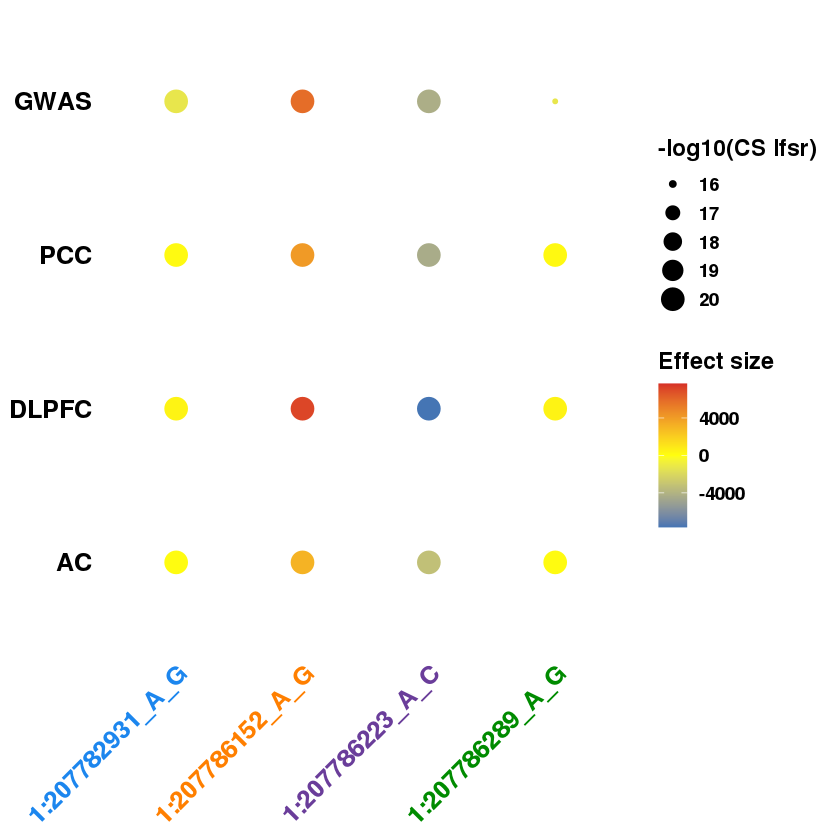

In [83]:
a %>% mvsusie_plot()

#### Sept

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


Suggested PDF canvas width: 7.8 height: 2.8 


$plot

$width
[1] 7.8

$height
[1] 2.8


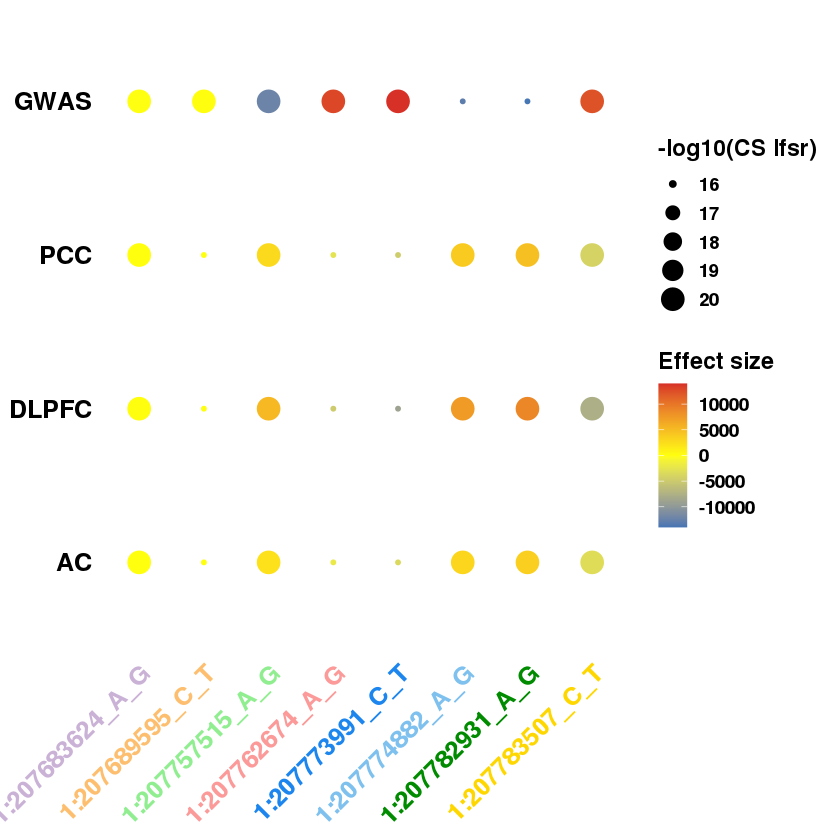

In [89]:
b %>% mvsusie_plot()

In [90]:
library("data.table")


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose





── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.




In [1]:
ld = readr::read_delim("/home/yh3455/Github/bioworkflows/GWAS/LDshare/ukb_exome_and_impute_merged_corr.sample_ld.gz",delim = "\t",col_names = F )


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.




In [2]:
dim(ld)

[1] 11877 11876

In [6]:
sum(is.na(ld))

[1] 0

In [7]:
ld[1,]

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X11867,X11868,X11869,X11870,X11871,X11872,X11873,X11874,X11875,X11876
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr5:272741:A:G,chr5:272748:G:C,chr5:272755:A:G,chr5:272758:A:G,chr5:272771:C:G,chr5:272816:C:T,chr5:272822:T:G,chr5:272829:T:C,chr5:275930:G:A,chr5:275953:C:T,...,chr5:1212543:G:A,chr5:1212548:C:T,chr5:1212586:G:A,chr5:1212794:G:A,chr5:1212911:C:T,chr5:1212979:C:T,chr5:1213019:G:A,chr5:1213108:C:T,chr5:1213289:T:TC,chr5:1213395:C:T
